In [45]:
import sklearn.datasets

groups = ['comp.graphics', 'alt.atheism', 'rec.autos', 'talk.politics.guns', 'sci.space']

all_data = sklearn.datasets.fetch_20newsgroups(subset = 'all', categories=groups, remove=('headers', 'footers', 'quotes'))
print(len(all_data.filenames))

4659


In [66]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /home/nikita/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [67]:
import nltk.stem
from nltk.tokenize import word_tokenize

english_stemmer = nltk.stem.SnowballStemmer('english')

for i in range(len(all_data.data)):
    word_list = word_tokenize(all_data.data[i])
    stemmed_doc = ""
    for word in word_list:
        stemmed_doc = stemmed_doc + " " + english_stemmer.stem(word)
    all_data.data[i] = stemmed_doc  

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 2, stop_words=["english"], token_pattern=r"[^\W\d_]+")
print(vectorizer)

vectorized = vectorizer.fit_transform(all_data.data)
# число сообщений, длина словаря
num_samples, num_features = X_train.shape
print('num_samples= %d, num_features= %d' % (num_samples, num_features))

TfidfVectorizer(min_df=2, stop_words=['english'], token_pattern='[^\\W\\d_]+')
num_samples= 4659, num_features= 43417


In [69]:
print(vectorizer.get_feature_names_out())

['a' 'aa' 'aaa' ... 'zx' 'zyxel' 'þ']


In [70]:
print(vectorized.shape)

(4659, 13236)


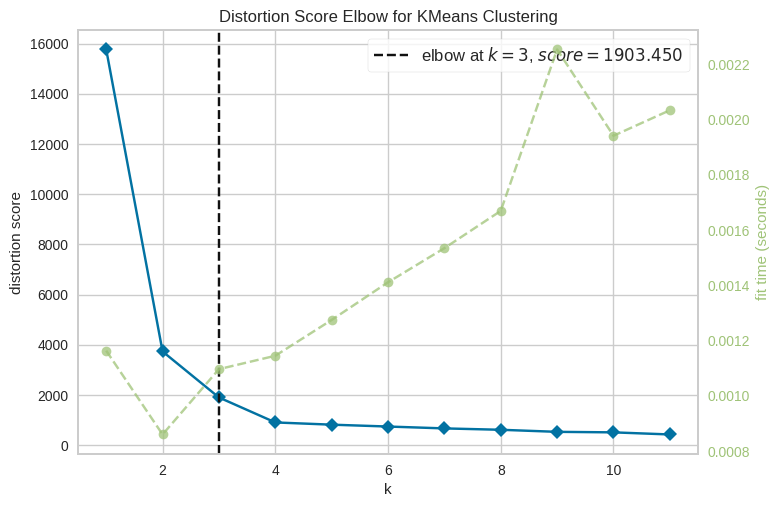

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))


visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    fig = plt.figure()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(vectorized)

    silhouette_avg = silhouette_score(vectorized, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(vectorized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # fig.set_title("The silhouette plot for the various clusters.")
    # fig.set_xlabel("The silhouette coefficient values")
    # fig.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # plt.show()

In [121]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=0.9)
cluster_labels = clusterer.fit_predict(vectorized)

unique_cluster_labels = np.unique(cluster_labels)

print(unique_cluster_labels)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [122]:
count_per_cluster = [0] * len(unique_cluster_labels[1:])
print(len(unique_cluster_labels))

for i in cluster_labels[1:]:
    count_per_cluster[i] += 1

print(count_per_cluster)


17
[154, 5, 14, 5, 6, 6, 10, 7, 5, 5, 5, 5, 5, 5, 5, 4416]


In [123]:
for ind, label in enumerate(cluster_labels):
    if label == 10:
        print(all_data.data[ind])
    

 pat sez ; yeah , but a windscreen cut down most of it . canopi end it complet . of cour , the environ in space continu to suck : - ) -tommi mac -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - tom mcwilliam 517-355-2178 wk \\ as the radius of vision increa , 18084tm @ ibm.cl.msu.edu 336-9591 hm \\ the circumf of mysteri grow .
 punchlin # 3 : it would be a good idea just to leav them there . -tommi mac -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - tom mcwilliam 517-355-2178 wk \\ as the radius of vision increa , 18084tm @ ibm.cl.msu.edu 336-9591 hm \\ the circumf of mysteri grow .
 nick hain sez ; level 5 ? out of how mani ? what are the differ level ? i ve never heard of this rate system . anyon care to clue me in ? -tommi mac -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - tom mcwilliam 517-355-2178